# **TCS iON RIO-125: Classification Model - Build a Model that Classifies the Side Effects of a Drug**


---



---



---



# **Importing Libraries**



In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

In [2]:
pip install Faker

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.7/1.7 MB 62.6 MB/s eta 0:00:00


In [3]:
from faker import Faker
import datetime
from sklearn.preprocessing import LabelEncoder
from textblob import TextBlob

# **Accessing the data**

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [5]:
df = pd.read_csv('/content/drive/My Drive/TCS iON Internship/webmd.csv')

### **Addition of Name and Race Columns**

In [6]:
fake = Faker()

#Name
df['Name'] = [fake.name() for _ in range(len(df))]

#Race
df['Race'] = [fake.random_element(elements=['Asian', 'Black', 'White', 'Hispanic', 'Other']) for _ in range(len(df))]

In [7]:
#Reorder the columns

cols = ['Name', 'Age', 'Sex','Race', 'Date', 'DrugId', 'Drug', 'Condition', 'EaseofUse',
       'Effectiveness', 'Satisfaction', 'UsefulCount', 'Sides', 'Reviews',]
df = df[cols]

# **EDA**

In [8]:
df.shape

(362806, 14)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 362806 entries, 0 to 362805
Data columns (total 14 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   Name           362806 non-null  object
 1   Age            362806 non-null  object
 2   Sex            362806 non-null  object
 3   Race           362806 non-null  object
 4   Date           362806 non-null  object
 5   DrugId         362806 non-null  int64 
 6   Drug           362806 non-null  object
 7   Condition      362806 non-null  object
 8   EaseofUse      362806 non-null  int64 
 9   Effectiveness  362806 non-null  int64 
 10  Satisfaction   362806 non-null  int64 
 11  UsefulCount    362806 non-null  int64 
 12  Sides          362806 non-null  object
 13  Reviews        362769 non-null  object
dtypes: int64(5), object(9)
memory usage: 38.8+ MB


In [10]:
df.nunique()

Name             180933
Age                  12
Sex                   3
Race                  5
Date               4524
DrugId             6572
Drug               7093
Condition          1806
EaseofUse             7
Effectiveness         7
Satisfaction          7
UsefulCount         148
Sides              1651
Reviews          250167
dtype: int64

In [11]:
df.describe()

,DrugId,EaseofUse,Effectiveness,Satisfaction,UsefulCount
count,362806.000000,362806.000000,362806.000000,362806.000000,362806.000000
mean,36879.370774,4.019829,3.532061,3.135408,6.744916
std,52624.412971,1.317711,1.455961,1.611106,9.324240
min,1.000000,1.000000,1.000000,1.000000,0.000000
25%,4896.000000,3.000000,3.000000,1.000000,1.000000
50%,9548.000000,5.000000,4.000000,3.000000,4.000000
75%,63522.000000,5.000000,5.000000,5.000000,9.000000
max,178546.000000,10.000000,10.000000,10.000000,255.000000


#### **Columns**

In [12]:
df['Age'].value_counts()

45-54         80043
55-64         75136
35-44         55011
25-34         49718
65-74         41216
19-24         24230
75 or over    15226
              12202
13-18          7045
7-12           1644
3-6             838
0-2             497
Name: Age, dtype: int64

In [13]:
df['Sex'].value_counts()

Female    238226
Male       98043
           26537
Name: Sex, dtype: int64

In [14]:
df['Race'].value_counts()

Asian       72824
Black       72765
Other       72725
Hispanic    72357
White       72135
Name: Race, dtype: int64

In [15]:
df['Drug'].value_counts()

cymbalta                               4648
lisinopril                             4269
lisinopril solution                    4269
lexapro                                4134
hydrocodone-acetaminophen              3944
                                       ... 
sorbsan bandage                           1
sorbsan topical wound dressing 3" x       1
q-pap extra strength                      1
symax                                     1
vanadium granules                         1
Name: Drug, Length: 7093, dtype: int64

In [16]:
df['Condition'].value_counts()

Other                                                  49765
Pain                                                   25232
High Blood Pressure                                    23275
Depression                                             14509
Birth Control                                          12253
                                                       ...  
Diagnostic Test for Myasthenia Gravis                      1
Myelodysplastic Syndrome with 5q Deletion Gene Type        1
Hunter Syndrome                                            1
Increased Uric Acid due to Cancer Chemotherapy             1
Adverse Effect of Benzodiazepine-Based Tranquilizer        1
Name: Condition, Length: 1806, dtype: int64

In [17]:
df['Condition'].nunique()

1806

In [18]:
df['EaseofUse'].value_counts()

5     192650
4      74732
3      41303
1      35927
2      18191
6          2
10         1
Name: EaseofUse, dtype: int64

In [19]:
df['Effectiveness'].value_counts()

5     130388
4      81821
3      60406
1      59387
2      30801
6          2
10         1
Name: Effectiveness, dtype: int64

In [20]:
df['Satisfaction'].value_counts()

5     111550
1     100901
4      63158
3      51852
2      35342
6          2
10         1
Name: Satisfaction, dtype: int64

In [21]:
df['UsefulCount'].value_counts()

0      71608
1      46240
2      34701
3      27307
4      22862
       ...  
136        1
178        1
176        1
169        1
95         1
Name: UsefulCount, Length: 148, dtype: int64

## **Data Visualization**

### **Univariate Analysis**

#### **Histogram**

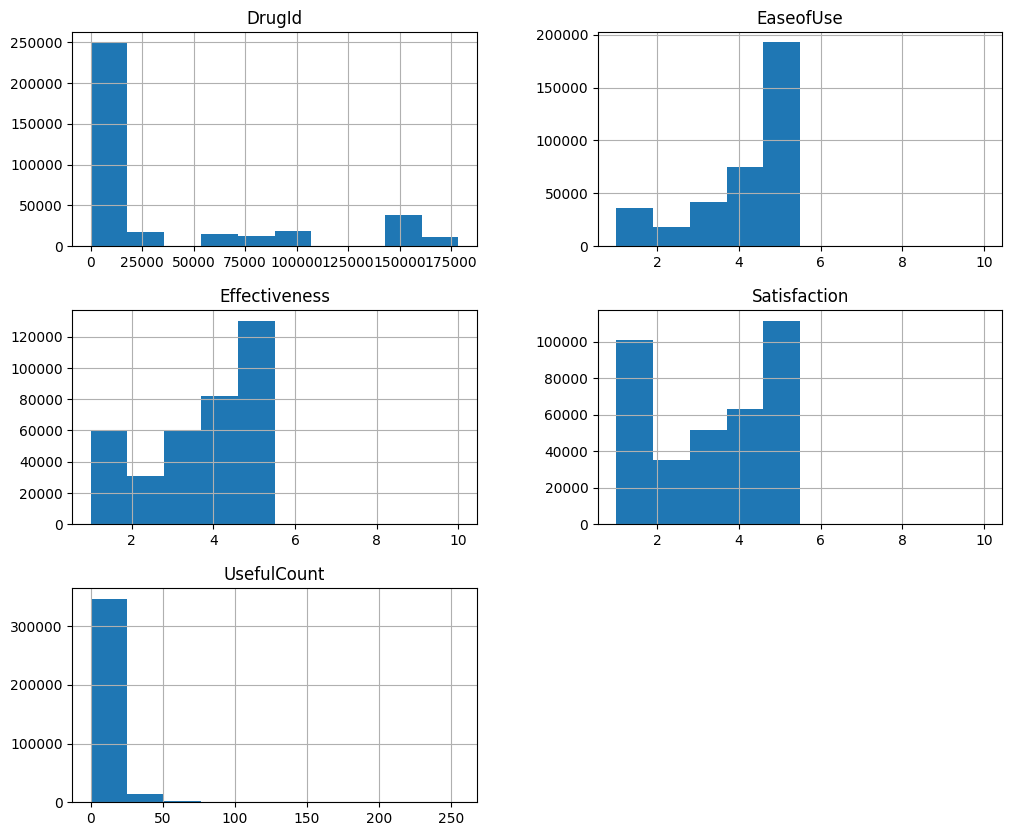

In [22]:
#Histograms

freqgraph = df.select_dtypes(include=['int64','float64'])
freqgraph.hist(figsize=(12,10))
plt.show()

#### **Count plots**

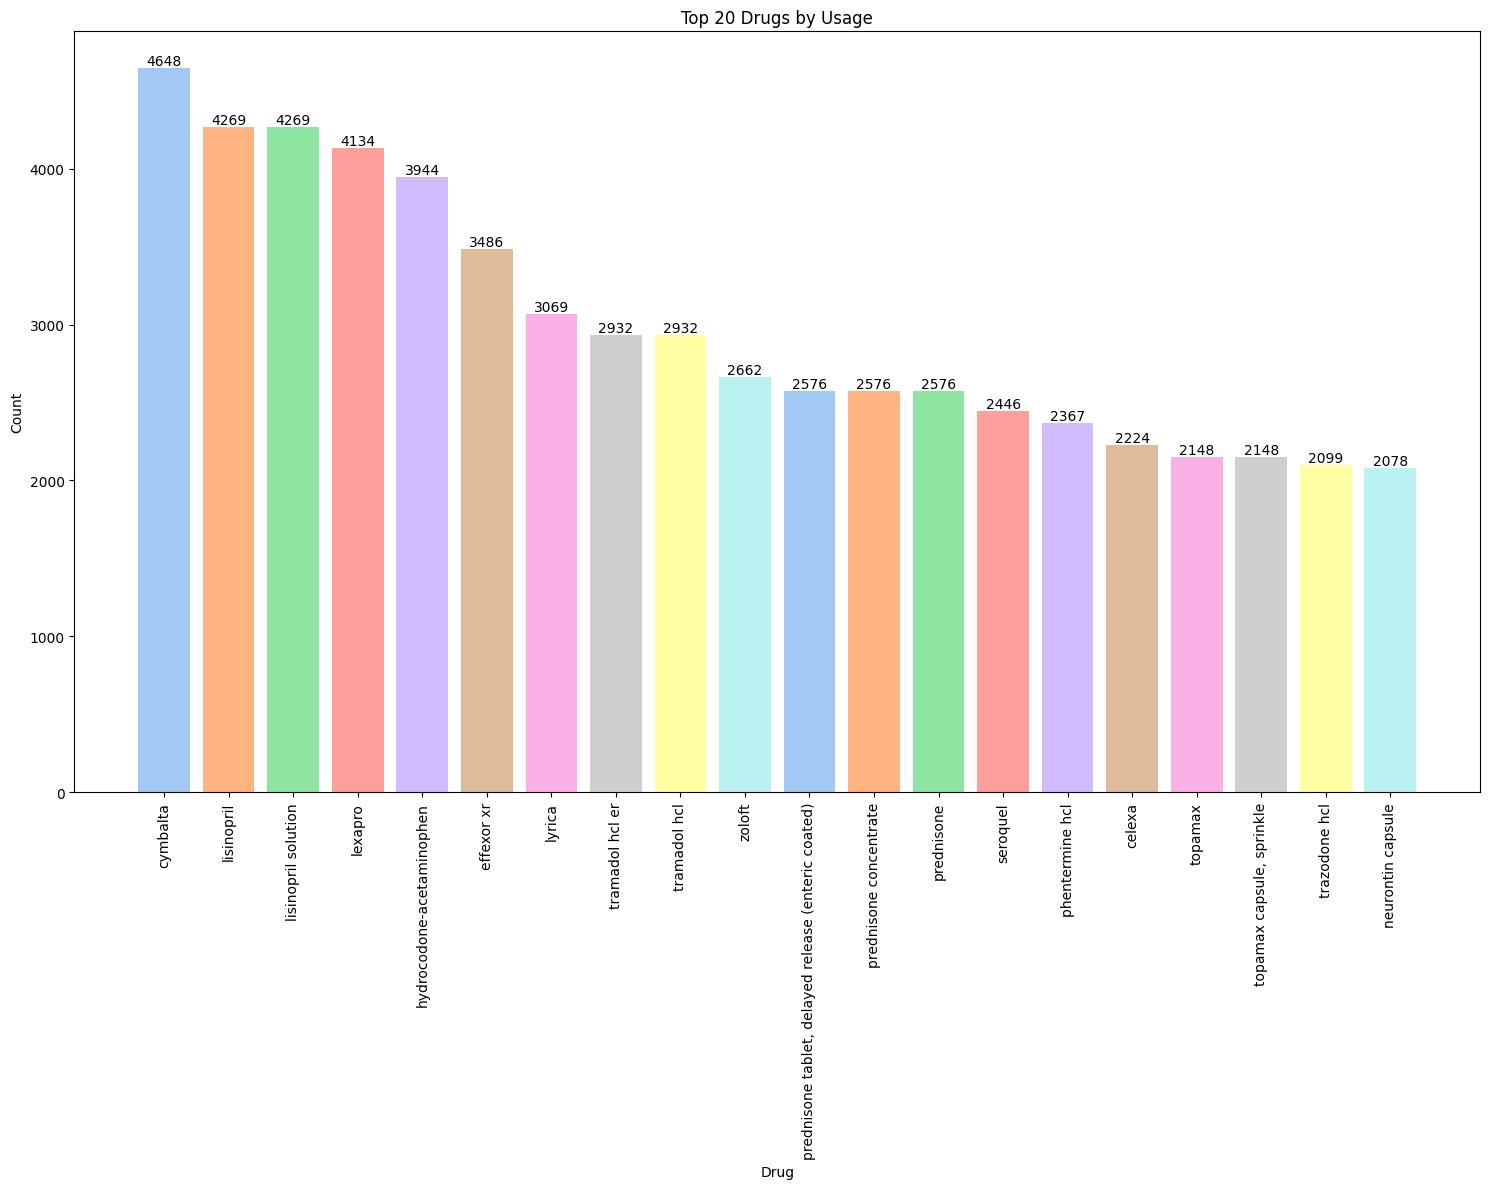

In [23]:
#Top Used Drugs

drug_counts = df['Drug'].value_counts()
top_20_drugs = drug_counts.head(20)

colors = sns.color_palette('pastel')

plt.figure(figsize=(15, 12))
bars = plt.bar(top_20_drugs.index, top_20_drugs.values, color = colors)
plt.xlabel('Drug')
plt.ylabel('Count')
plt.title('Top 20 Drugs by Usage')
plt.xticks(rotation=90)
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')
plt.show()

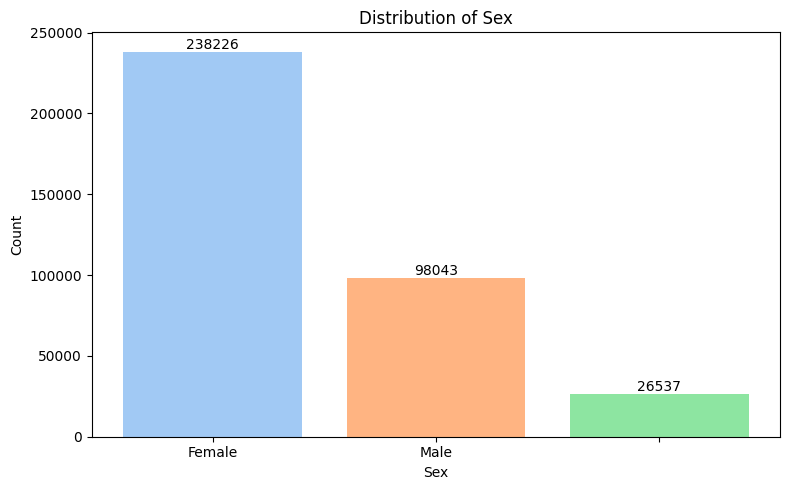

In [24]:
#Sex

sex_counts = df['Sex'].value_counts()

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
bars = plt.bar(sex_counts.index, sex_counts.values, color = colors)
plt.xlabel('Sex')
plt.ylabel('Count')
plt.title('Distribution of Sex')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.show()

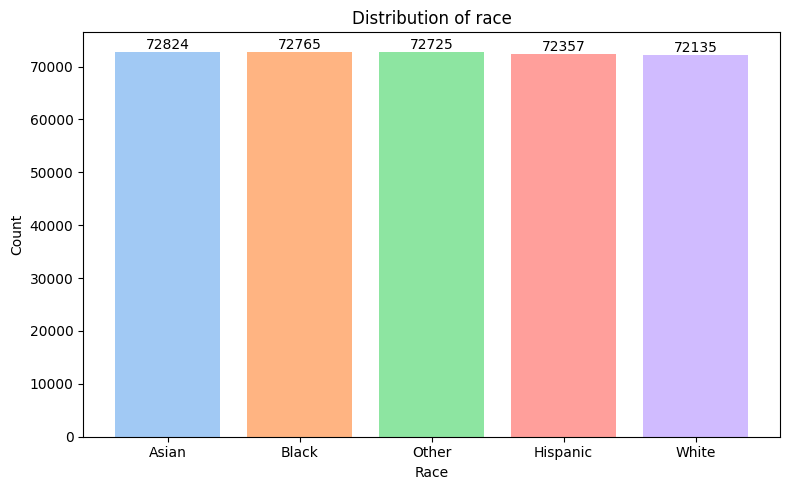

In [25]:
#Race

race_counts = df['Race'].value_counts()

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
bars = plt.bar(race_counts.index, race_counts.values, color = colors)
plt.xlabel('Race')
plt.ylabel('Count')
plt.title('Distribution of race')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.show()

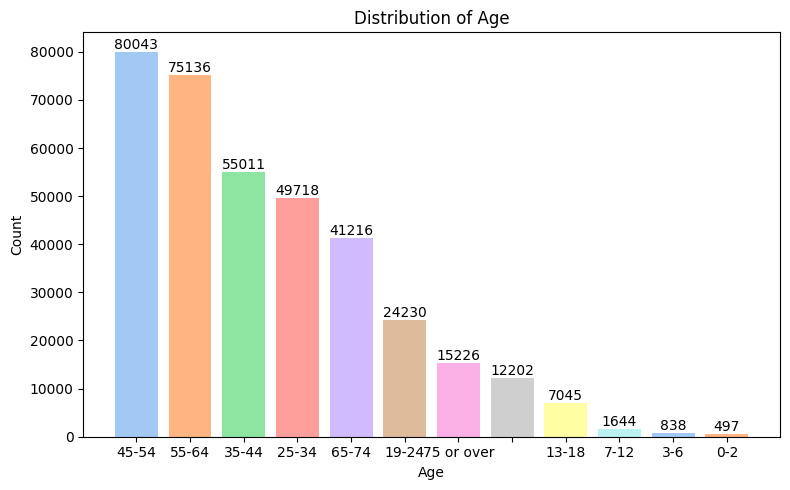

In [26]:
#Age

age_counts = df['Age'].value_counts()

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
bars = plt.bar(age_counts.index, age_counts.values, color = colors)
plt.xlabel('Age')
plt.ylabel('Count')
plt.title('Distribution of Age')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.show()

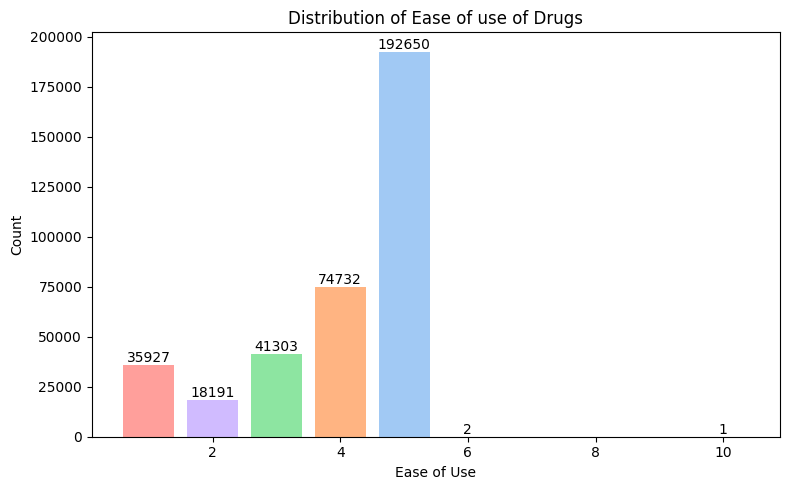

In [27]:
#EaseofUse

eou = df['EaseofUse'].value_counts()

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
bars = plt.bar(eou.index, eou.values, color = colors)
plt.xlabel('Ease of Use')
plt.ylabel('Count')
plt.title('Distribution of Ease of use of Drugs')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.show()

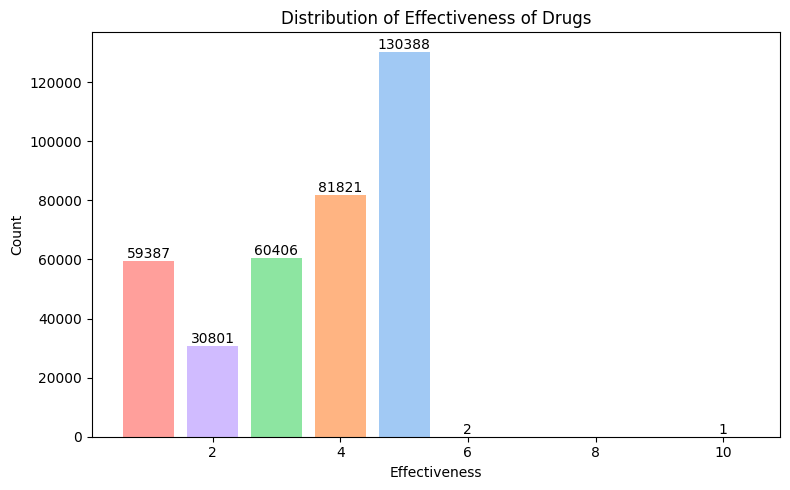

In [28]:
#Effectiveness

eff = df['Effectiveness'].value_counts()

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
bars = plt.bar(eff.index, eff.values, color = colors)
plt.xlabel('Effectiveness')
plt.ylabel('Count')
plt.title('Distribution of Effectiveness of Drugs')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.show()

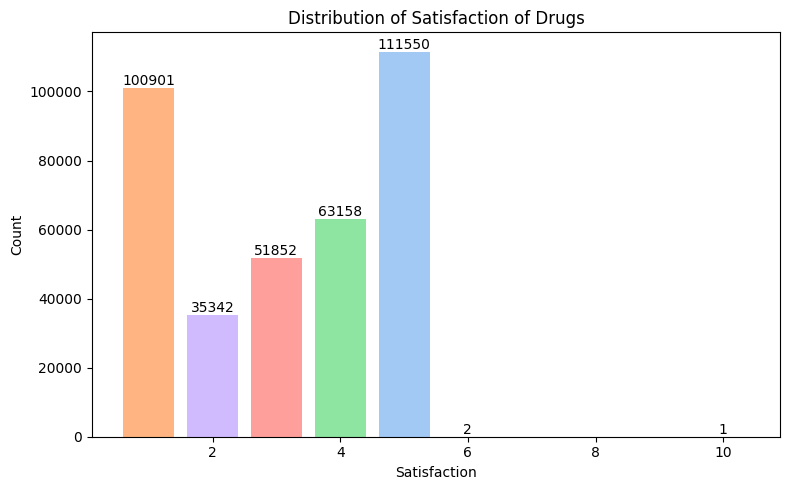

In [29]:
#Satisfaction

sat = df['Satisfaction'].value_counts()

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
bars = plt.bar(sat.index, sat.values, color = colors)
plt.xlabel('Satisfaction')
plt.ylabel('Count')
plt.title('Distribution of Satisfaction of Drugs')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.show()

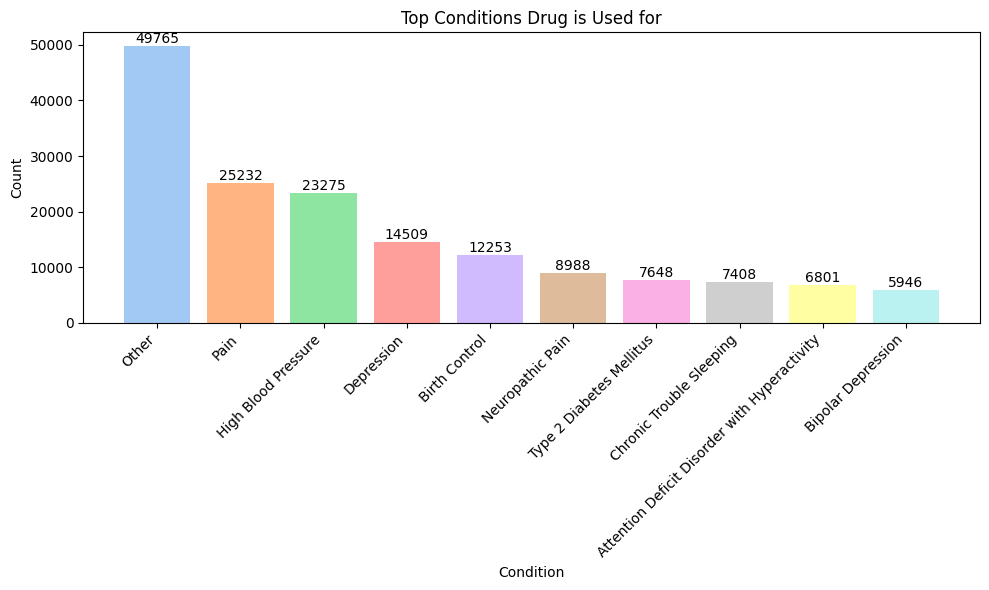

In [30]:
#Condition

condition_counts = df['Condition'].value_counts()
N = 10
top_conditions = condition_counts.head(N)

colors = sns.color_palette('pastel')

plt.figure(figsize=(10, 6))
bars = plt.bar(top_conditions.index, top_conditions.values, color = colors)
plt.xlabel('Condition')
plt.ylabel('Count')
plt.title('Top Conditions Drug is Used for')
plt.xticks(rotation=45, ha='right')

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

### **Bivariate Analysis**

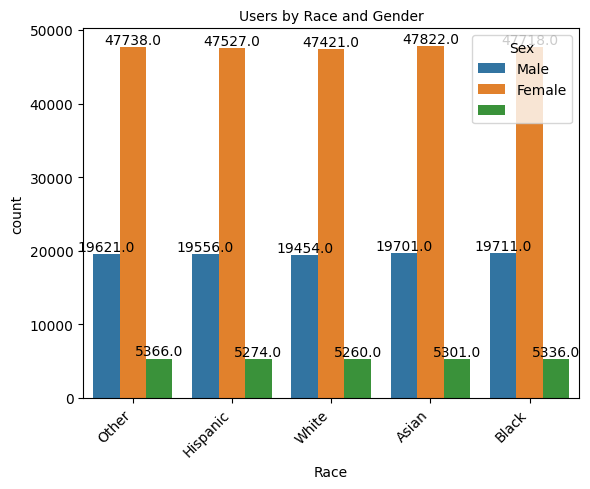

In [31]:
#Race Vs Gender

sns.countplot(x='Race', hue='Sex', data=df)

plt.title("Users by Race and Gender", fontsize=10)
plt.xticks(rotation=45, ha='right')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(height, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()


<Figure size 1000x800 with 0 Axes>

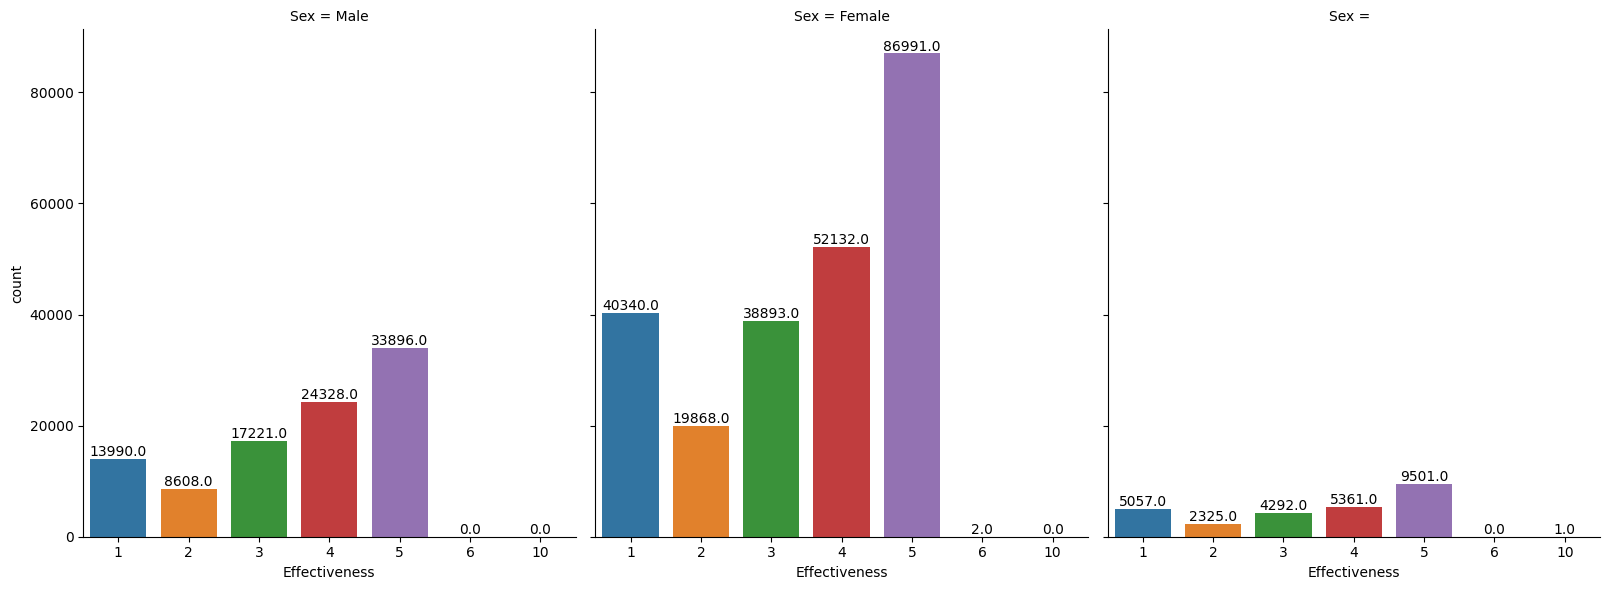

In [32]:
#Effectiveness Vs Sex

plt.figure(figsize=(10,8))
g = sns.catplot(x="Effectiveness",col="Sex",
                data=df, kind="count",
                height=6,aspect =.9);

for ax in g.axes.flatten():
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

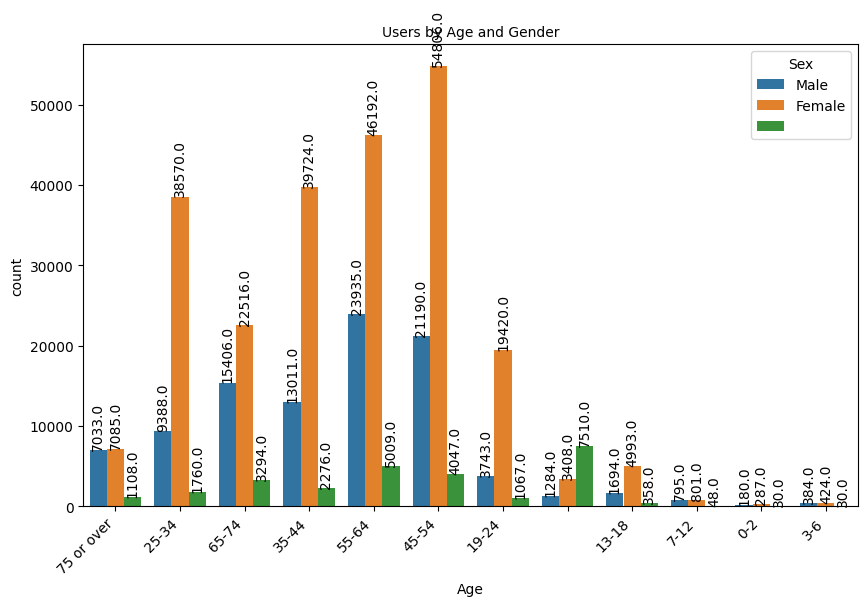

In [33]:
#Age Vs Sex

plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Sex',data=df)
plt.title("Users by Age and Gender", fontsize = 10)
plt.xticks(rotation=45, ha='right')

ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.annotate(height, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', rotation='vertical')

# **Data Preprocessing**

## **Missing value handling**

In [34]:
df.dropna(inplace=True)

In [35]:
df.isna().sum()

Name             0
Age              0
Sex              0
Race             0
Date             0
DrugId           0
Drug             0
Condition        0
EaseofUse        0
Effectiveness    0
Satisfaction     0
UsefulCount      0
Sides            0
Reviews          0
dtype: int64

In [36]:
# Handling instances with whitespaces

for i in df:
    df[i]=np.where(df[i]==" ",np.NAN,df[i])

df.isna().sum()

Name                 0
Age              12199
Sex              26533
Race                 0
Date                 0
DrugId               0
Drug                 0
Condition           43
EaseofUse            0
Effectiveness        0
Satisfaction         0
UsefulCount          0
Sides            17454
Reviews          41824
dtype: int64

In [37]:
df.dropna(inplace = True)
df.isna().sum()

Name             0
Age              0
Sex              0
Race             0
Date             0
DrugId           0
Drug             0
Condition        0
EaseofUse        0
Effectiveness    0
Satisfaction     0
UsefulCount      0
Sides            0
Reviews          0
dtype: int64

In [38]:
# Handling instances with double whitespaces

for i in df:
    df[i]=np.where(df[i]=="  ",np.NAN,df[i])

df.isna().sum()

Name             0
Age              0
Sex              0
Race             0
Date             0
DrugId           0
Drug             0
Condition        0
EaseofUse        0
Effectiveness    0
Satisfaction     0
UsefulCount      0
Sides            0
Reviews          4
dtype: int64

In [39]:
df.dropna(inplace = True)
df.isna().sum()

Name             0
Age              0
Sex              0
Race             0
Date             0
DrugId           0
Drug             0
Condition        0
EaseofUse        0
Effectiveness    0
Satisfaction     0
UsefulCount      0
Sides            0
Reviews          0
dtype: int64

## **Duplicates handling**

In [40]:
df.duplicated().sum()

0

In [41]:
df.shape

(280123, 14)

In [42]:
df.nunique()

Name             152242
Age                  11
Sex                   2
Race                  5
Date               4517
DrugId             4522
Drug               5014
Condition          1584
EaseofUse             6
Effectiveness         6
Satisfaction          6
UsefulCount         144
Sides              1594
Reviews          216363
dtype: int64

# **Feature Engineering**

### **Date**

In [43]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month

### **Age**

In [44]:
def age_add(data):
    if '0-2' in data.lower():
        return 'Pediatric'
    elif '3-6' in data.lower():
        return 'Pediatric'
    elif '7-12' in data.lower():
        return 'Pediatric'
    elif '13-18' in data.lower():
        return 'Young'
    elif '19-24' in data.lower():
        return 'Young'
    elif '25-34' in data.lower():
        return 'Young'
    elif '35-44' in data.lower():
        return 'Young'
    elif '45-54' in data.lower():
        return 'Middle Age'
    elif '55-64' in data.lower():
        return 'Middle Age'
    elif '65-74' in data.lower():
        return 'Elderly'
    elif '75 or over' in data.lower():
        return 'Elderly'
    else:
        return 'Na'


df['Age group'] = df['Age'].apply(age_add)

### **Side Effects**

In [45]:
#Creating Side effects from Side

def side_effect_add(data):
    if 'bleeding' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'blood' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'clot' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'allergy' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'tremor' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'insomnia' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'anxiety' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'swelling' in data.lower():
        return 'Moderate Side Effects'
    elif 'tension' in data.lower():
        return 'Severe Side Effects'
    elif 'tb' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'memory loss' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'rash' in data.lower():
        return 'Severe Side Effects'
    elif 'vaginal bleeding' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'fatigue' in data.lower():
        return 'Severe Side Effects'
    elif 'itching' in data.lower():
        return 'Moderate Side Effects'
    elif 'Vomiting' in data.lower():
        return 'Severe Side Effects'
    elif 'cough' in data.lower():
        return 'Moderate Side Effects'
    elif 'dizziness' in data.lower():
        return 'Mild Side Effects'
    elif 'Diarrhea' in data.lower():
        return 'Mild Side Effects'
    elif 'sneezing' in data.lower():
        return 'Mild Side Effects'
    elif 'Tiredness' in data.lower():
        return 'Moderate Side Effects'
    elif 'loss of coordination' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'pain' in data.lower():
        return 'Extremely Severe Side Effects'
    elif 'gas' in data.lower():
        return 'Moderate Side Effects'
    elif 'bloating' in data.lower():
        return 'Moderate Side Effects'
    elif 'blurred vision' in data.lower():
        return 'Moderate Side Effects'
    elif 'headache' in data.lower():
        return 'Moderate Side Effects'
    elif 'sores' in data.lower():
        return 'Mild Side Effects'
    elif 'cramps' in data.lower():
        return 'Mild Side Effects'
    elif 'burning' in data.lower():
        return 'Severe Side Effects'
    elif 'No Side Effects' in data:
        return 'No Side Effects'
    else:
        return 'Mild Side Effects'

In [46]:
df['Side effects'] = df['Sides'].apply(side_effect_add)

In [47]:
df['Side effects'].value_counts()

Mild Side Effects                161778
Moderate Side Effects             62155
Extremely Severe Side Effects     50904
Severe Side Effects                5286
Name: Side effects, dtype: int64

In [48]:
#No. of Side effects

df['No.of Side effects'] = df['Sides'].str.count(',') + 1

## **Data Visualization of New features**

#### **Univariate**

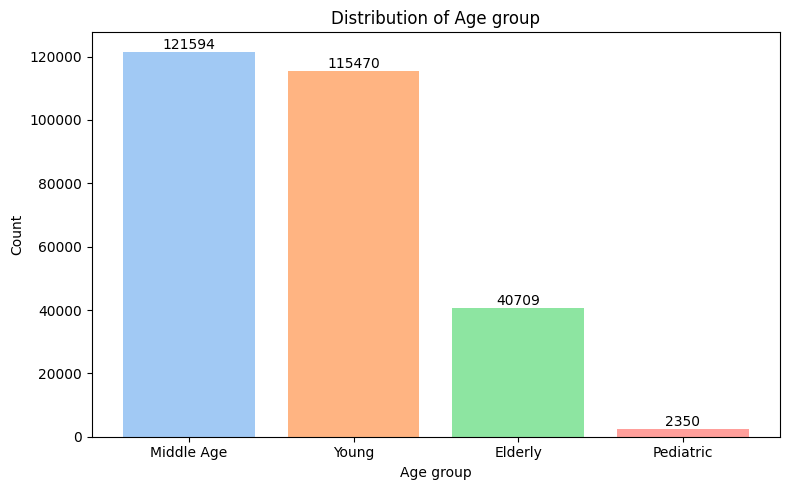

In [49]:
#Age group

age_g = df['Age group'].value_counts()

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
bars = plt.bar(age_g.index, age_g.values, color = colors)
plt.xlabel('Age group')
plt.ylabel('Count')
plt.title('Distribution of Age group')
plt.tight_layout()

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.show()

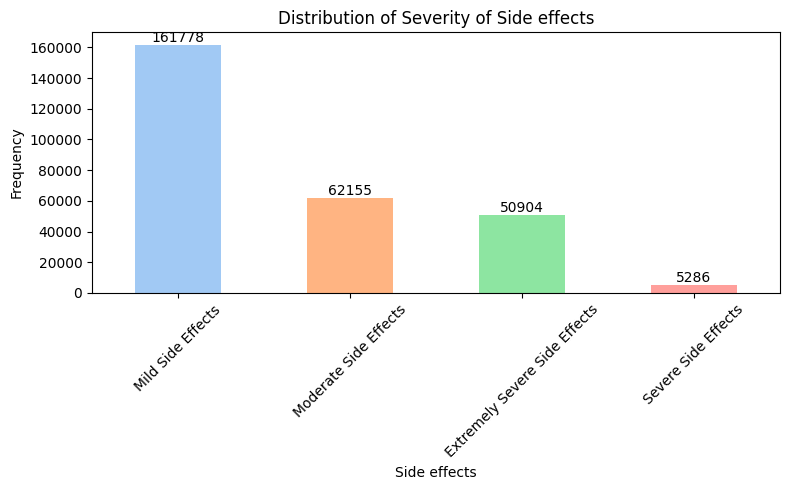

In [50]:
#Severity of Side effects

severity_counts = df['Side effects'].value_counts()

colors = sns.color_palette('pastel')

plt.figure(figsize=(8, 5))
ax = severity_counts.plot(kind='bar', color=colors)
plt.xlabel('Side effects')
plt.ylabel('Frequency')
plt.title('Distribution of Severity of Side effects')
plt.xticks(rotation=45)
plt.tight_layout()

for p in ax.patches:
    height = p.get_height()
    ax.annotate(height, (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom')

plt.show()

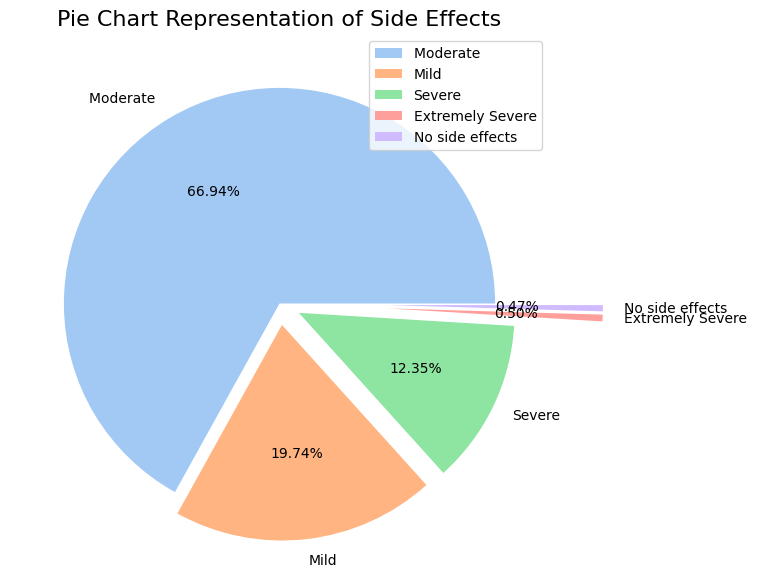

In [51]:
#Pie chart

size = [186216, 54913, 34354, 1393, 1294]
colors = sns.color_palette('pastel')
labels = "Moderate ","Mild", "Severe", "Extremely Severe", "No side effects"
explode = [0, 0.1, 0.1, 0.5, 0.5]

plt.rcParams['figure.figsize'] = (7,7)
plt.pie(size, colors = colors, labels = labels, explode = explode, autopct = '%.2f%%')
plt.axis('off')
plt.title('Pie Chart Representation of Side Effects', fontsize = 16)
plt.legend(loc='upper right')
plt.show()

#### **Bivariate**

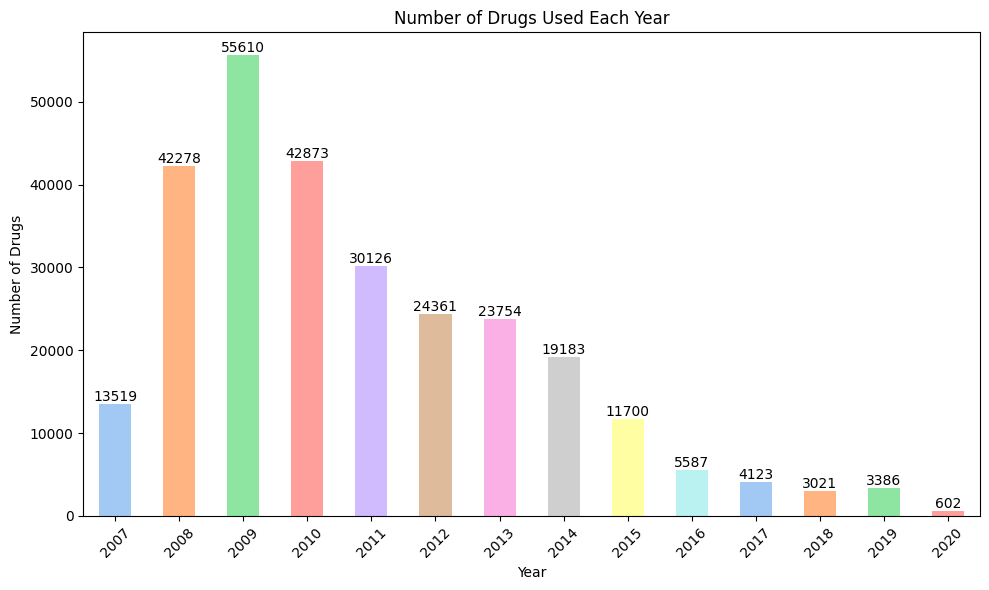

In [52]:
#Year Vs Drug usage

drugs_per_year = df.groupby('Year')['Drug'].count()

colors = sns.color_palette('pastel')

plt.figure(figsize=(10, 6))
bars = drugs_per_year.plot(kind='bar', color=colors)
plt.xlabel('Year')
plt.ylabel('Number of Drugs')
plt.title('Number of Drugs Used Each Year')
plt.xticks(rotation=45)
plt.tight_layout()

# Add count values above each bar
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.show()

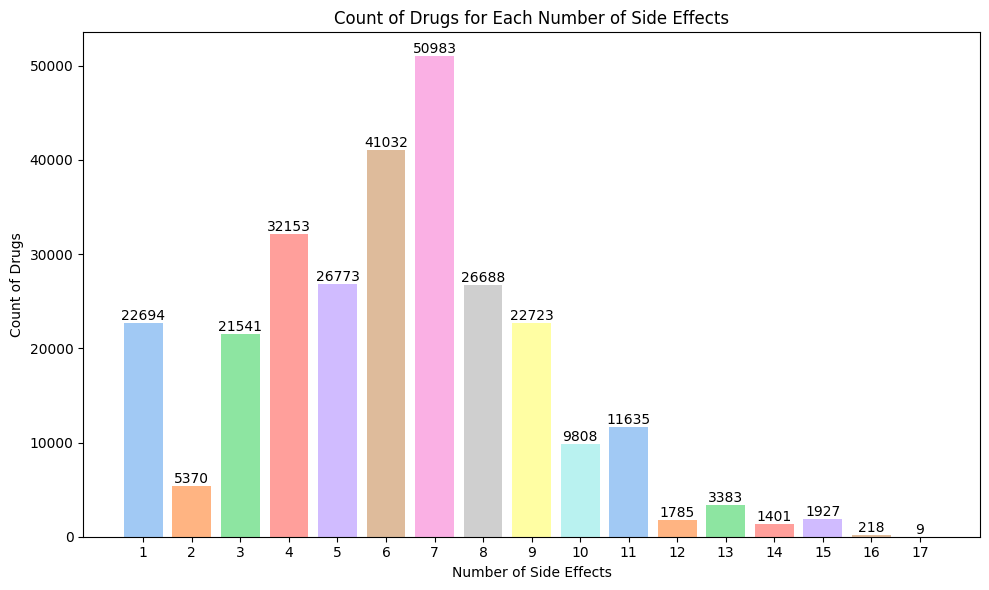

In [53]:
#Drugs Vs No.of Side effcts

count_per_side_effects = df['No.of Side effects'].value_counts().sort_index()

colors = sns.color_palette('pastel')

plt.figure(figsize=(10, 6))
bars = plt.bar(count_per_side_effects.index, count_per_side_effects.values, color = colors)
plt.xlabel('Number of Side Effects')
plt.ylabel('Count of Drugs')
plt.title('Count of Drugs for Each Number of Side Effects')
x_ticks = range(min(count_per_side_effects.index), max(count_per_side_effects.index) + 1, 1)
plt.xticks(x_ticks)

for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, yval, ha='center', va='bottom')

plt.tight_layout()
plt.show()

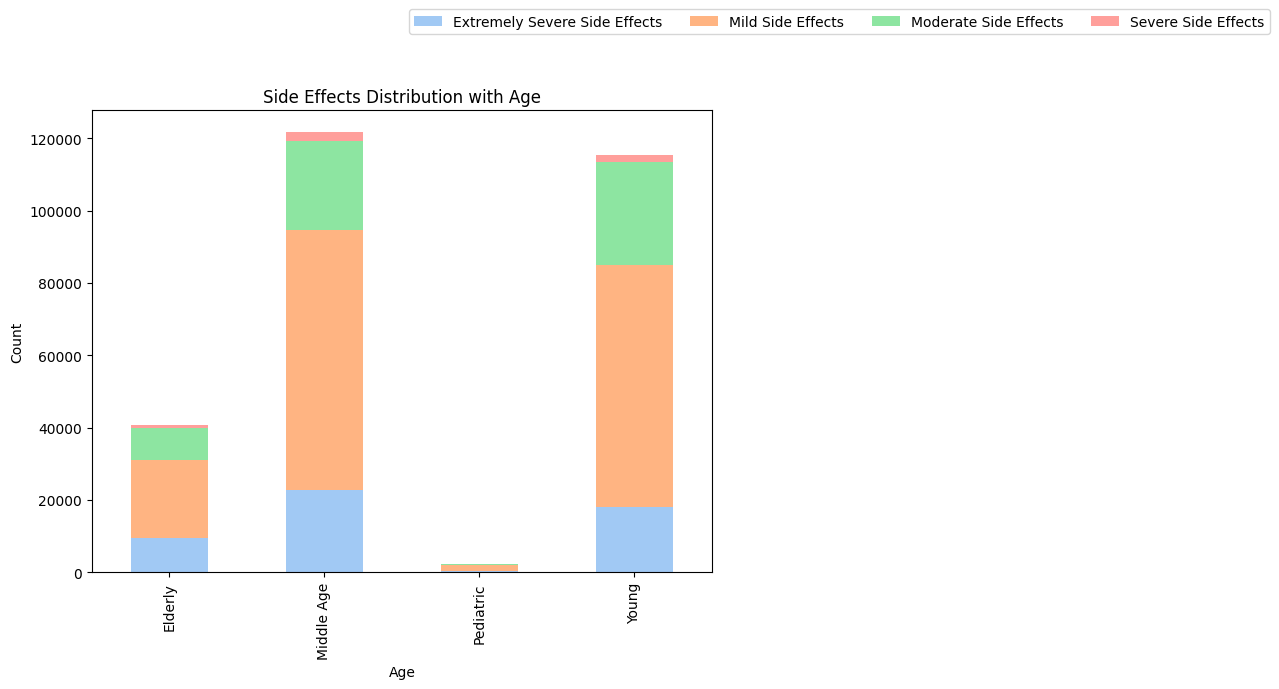

In [54]:
#Side Effects with Age- Stalked Bar

df_plot = df.groupby(['Side effects', 'Age group']).size().reset_index().pivot(columns='Side effects', index='Age group', values=0)

colors = sns.color_palette('pastel')

df_plot.plot(kind='bar', stacked=True, color=colors, figsize=(8,6))
plt.ylabel("Count")
plt.xlabel("Age")
plt.title('Side Effects Distribution with Age')
plt.legend(loc='lower left', bbox_to_anchor=(0.5, 1.15), ncol=5)

plt.show()

<Figure size 1000x800 with 0 Axes>

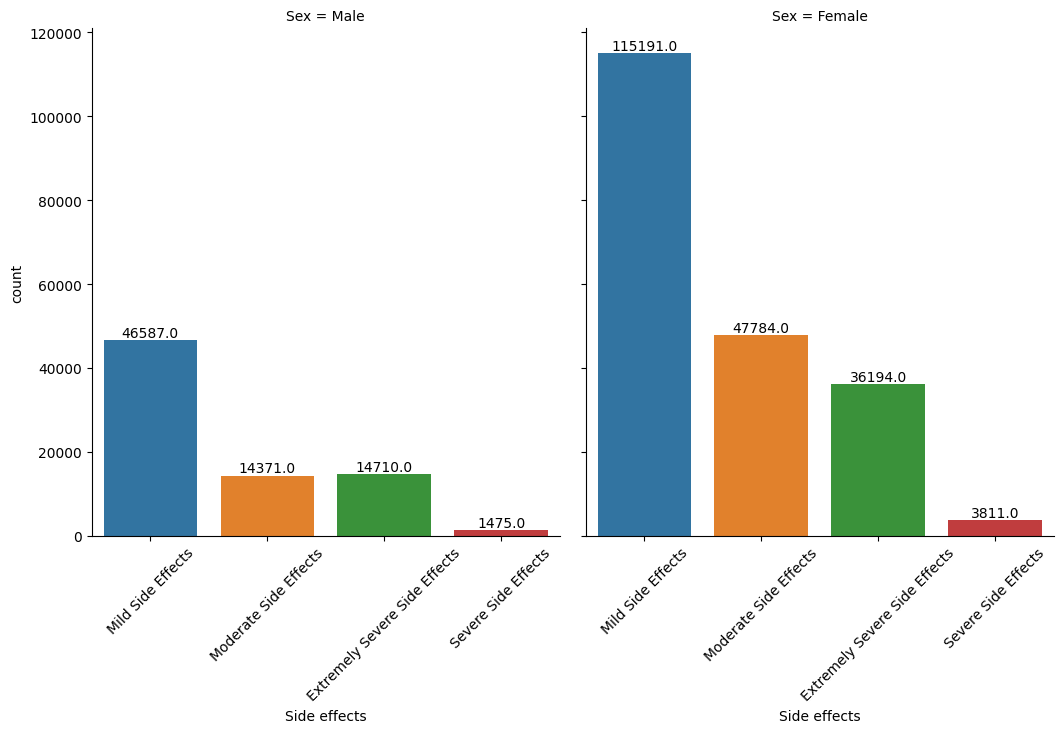

In [55]:
#Severity of Side effects Vs Sex

plt.figure(figsize=(10,8))
g = sns.catplot(x = 'Side effects', col = 'Sex', data = df, kind = 'count', height = 6, aspect = 0.9);

for ax in g.axes.flatten():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)  # Rotate x-axis labels

    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')


<Figure size 1000x800 with 0 Axes>

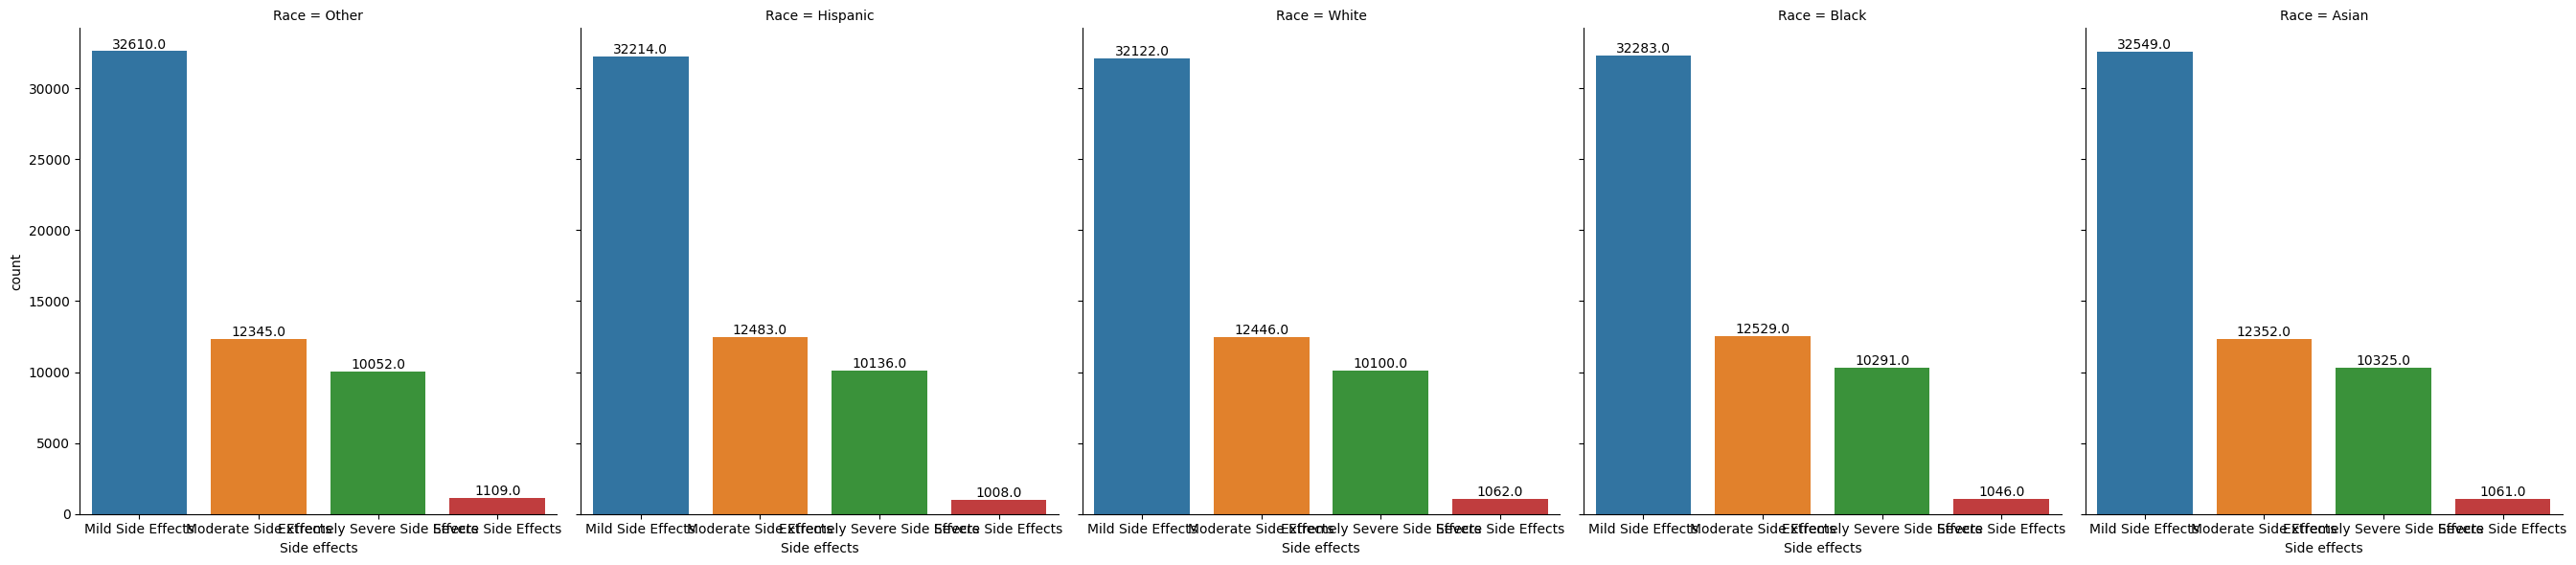

In [56]:
#Severity of Side effects Vs Race

plt.figure(figsize=(10,8))
g = sns.catplot(x = 'Side effects', col = 'Race', data = df, kind = 'count', height = 6, aspect = 0.9);

for ax in g.axes.flatten():
    for p in ax.patches:
        ax.annotate(f'{p.get_height()}', (p.get_x() + p.get_width() / 2., p.get_height()),
                    ha='center', va='center', xytext=(0, 5), textcoords='offset points')

<Axes: xlabel='Age', ylabel='count'>

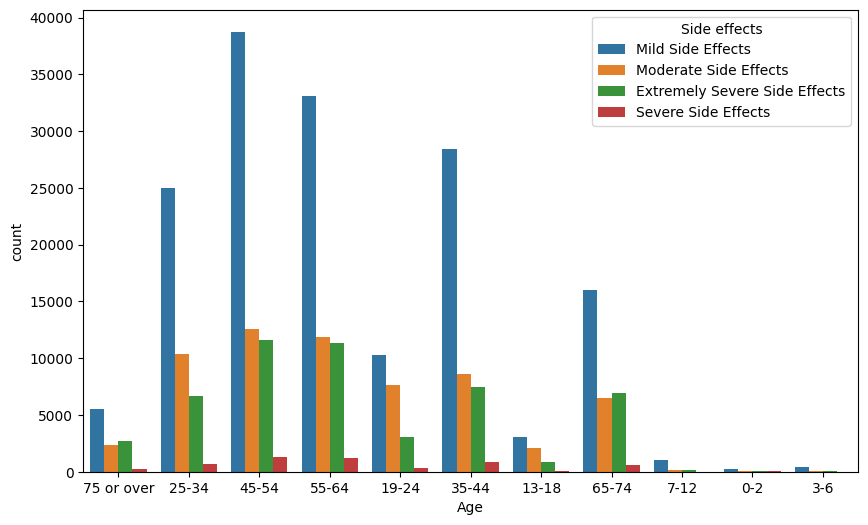

In [57]:
#Severity of Side effects Vs Age

plt.figure(figsize=(10, 6))
sns.countplot(x='Age',hue='Side effects',data=df)

#### **Multivariate Analysis**

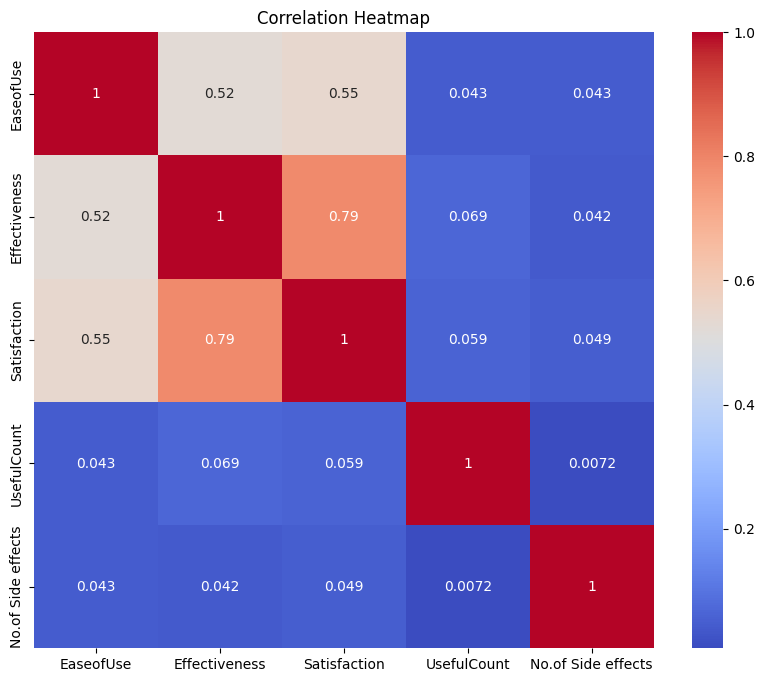

In [58]:
columns = ['Age', 'EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount', 'No.of Side effects', 'Side effects']
num_cols = df[columns]
correlation_matrix = num_cols.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [59]:
df.to_csv('Data Split', index = False)

# **Encoding & Scaling**

#### **Age & Sex**

In [60]:
pip install category_encoders

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 7.0 MB/s eta 0:00:00


In [61]:
#Label Encoding of Categorical columns

cat_cols = ['Race', 'Side effects', 'Sex', 'Age group', 'Drug', 'Condition']
label_encoder = LabelEncoder()
for column in cat_cols:
    df[column] = label_encoder.fit_transform(df[column])

In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280123 entries, 0 to 362805
Data columns (total 19 columns):
 #   Column              Non-Null Count   Dtype         
---  ------              --------------   -----         
 0   Name                280123 non-null  object        
 1   Age                 280123 non-null  object        
 2   Sex                 280123 non-null  int64         
 3   Race                280123 non-null  int64         
 4   Date                280123 non-null  datetime64[ns]
 5   DrugId              280123 non-null  float64       
 6   Drug                280123 non-null  int64         
 7   Condition           280123 non-null  int64         
 8   EaseofUse           280123 non-null  float64       
 9   Effectiveness       280123 non-null  float64       
 10  Satisfaction        280123 non-null  float64       
 11  UsefulCount         280123 non-null  float64       
 12  Sides               280123 non-null  object        
 13  Reviews             280123 no

# **Feature Selection**

In [63]:
df.columns

Index(['Name', 'Age', 'Sex', 'Race', 'Date', 'DrugId', 'Drug', 'Condition',
       'EaseofUse', 'Effectiveness', 'Satisfaction', 'UsefulCount', 'Sides',
       'Reviews', 'Year', 'Month', 'Age group', 'Side effects',
       'No.of Side effects'],
      dtype='object')

In [64]:
df.drop(['Name', 'Age', 'Sex',	'Date', 'DrugId', 'UsefulCount', 'Sides','Satisfaction',
       'Reviews', 'Year', 'Month', 'No.of Side effects','Race'], axis=1, inplace=True)

In [65]:
df.head(1)

,Drug,Condition,EaseofUse,Effectiveness,Age group,Side effects
0,2,1405,5.0,5.0,0,1


# **Model Building**

In [66]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 280123 entries, 0 to 362805
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Drug           280123 non-null  int64  
 1   Condition      280123 non-null  int64  
 2   EaseofUse      280123 non-null  float64
 3   Effectiveness  280123 non-null  float64
 4   Age group      280123 non-null  int64  
 5   Side effects   280123 non-null  int64  
dtypes: float64(2), int64(4)
memory usage: 15.0 MB


### **Splitting the data into test and train**

In [67]:
#Splitting data into target and features

x = df.drop('Side effects',axis=1)
y = df['Side effects']

In [68]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x.values,y,test_size=0.2,random_state=42)


In [69]:
# Feature Scaling

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

## **Model Training & Evaluation**

### **Logistic Regression**

In [70]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(multi_class='multinomial', solver='lbfgs')
model = clf.fit(x_train,y_train)
y_pred = model.predict(x_test)

In [71]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,precision_score,f1_score
Accuracy_lr = accuracy_score(y_test,y_pred)
print("Accuracy:",accuracy_score(y_test,y_pred))
print("Precision :",precision_score(y_test,y_pred,average='micro'))
print("Recall :",recall_score(y_test,y_pred,average='micro'))
print("f1 Score :",f1_score(y_test,y_pred,average='micro'))

Accuracy: 0.5757072735385989
Precision : 0.5757072735385989
Recall : 0.5757072735385989
f1 Score : 0.5757072735385989


In [72]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10329
           1       0.58      1.00      0.73     32259
           2       0.08      0.00      0.00     12396
           3       0.00      0.00      0.00      1041

    accuracy                           0.58     56025
   macro avg       0.16      0.25      0.18     56025
weighted avg       0.35      0.58      0.42     56025



**KNN Classifier**

In [73]:
from sklearn.neighbors import KNeighborsClassifier
metric_k = []
neighbors = np.arange(3,15)

for k in neighbors:
    classifier = KNeighborsClassifier(n_neighbors=k,metric='minkowski',p=2)
    model = classifier.fit(x_train,y_train)
    y_pred_knn = model.predict(x_test)
    acc = accuracy_score(y_test,y_pred_knn)
    metric_k.append(acc)

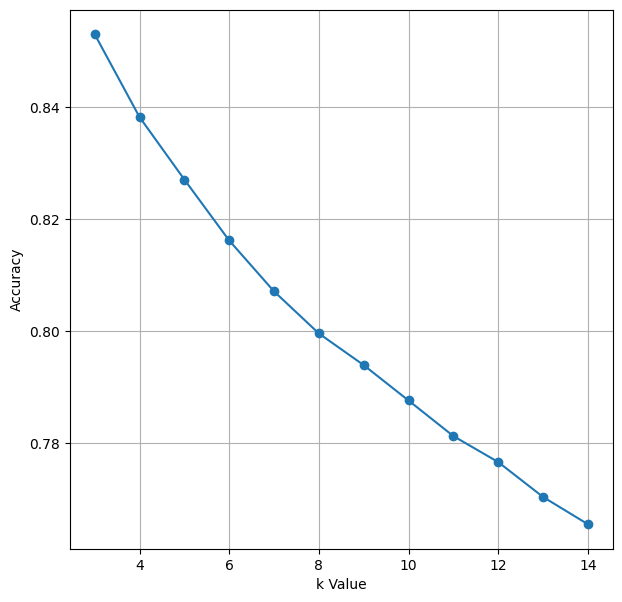

In [74]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k Value')
plt.ylabel('Accuracy')
plt.grid()

In [75]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,precision_score,f1_score
Accuracy_knn = accuracy_score(y_test,y_pred_knn)
print("Accuracy:",accuracy_score(y_test,y_pred_knn))
print("Precision :",precision_score(y_test,y_pred_knn,average='micro'))
print("Recall :",recall_score(y_test,y_pred_knn,average='micro'))
print("f1 Score :",f1_score(y_test,y_pred_knn,average='micro'))

Accuracy: 0.7655332440874609
Precision : 0.7655332440874609
Recall : 0.7655332440874609
f1 Score : 0.7655332440874609


In [76]:
print("Classification Report:\n",classification_report(y_test,y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10329
           1       0.58      1.00      0.73     32259
           2       0.08      0.00      0.00     12396
           3       0.00      0.00      0.00      1041

    accuracy                           0.58     56025
   macro avg       0.16      0.25      0.18     56025
weighted avg       0.35      0.58      0.42     56025



### **Naive Bayes classifier**

In [77]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(x_train, y_train)
y_pred_nb = gnb.predict(x_test)

In [78]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,precision_score,f1_score
Accuracy_knn = accuracy_score(y_test,y_pred_nb)
print("Accuracy:",accuracy_score(y_test,y_pred_nb))
print("Precision :",precision_score(y_test,y_pred_nb,average='micro'))
print("Recall :",recall_score(y_test,y_pred_nb,average='micro'))
print("f1 Score :",f1_score(y_test,y_pred_nb,average='micro'))

Accuracy: 0.5736010709504685
Precision : 0.5736010709504685
Recall : 0.5736010709504685
f1 Score : 0.5736010709504685


In [79]:
print("Classification Report:\n",classification_report(y_test,y_pred_nb))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10329
           1       0.58      0.99      0.73     32259
           2       0.28      0.01      0.02     12396
           3       0.00      0.00      0.00      1041

    accuracy                           0.57     56025
   macro avg       0.21      0.25      0.19     56025
weighted avg       0.39      0.57      0.42     56025



In [80]:
print("Confusion Matrix:\n",confusion_matrix(y_test,y_pred_nb))

Confusion Matrix:
 [[    0 10261    68     0]
 [    0 32011   248     0]
 [    0 12271   125     0]
 [    0  1031    10     0]]


### **Random Forest Classifier**

In [81]:
from sklearn.ensemble import RandomForestClassifier
rfclf = RandomForestClassifier(n_estimators=100, criterion = 'entropy', random_state=42)
rfclf.fit(x_train, y_train)
y_pred_rf = rfclf.predict(x_test)

In [82]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,precision_score,f1_score
Accuracy_knn = accuracy_score(y_test,y_pred_rf)
print("Accuracy:",accuracy_score(y_test,y_pred_rf))
print("Precision :",precision_score(y_test,y_pred_rf,average='micro'))
print("Recall :",recall_score(y_test,y_pred_rf,average='micro'))
print("f1 Score :",f1_score(y_test,y_pred_rf,average='micro'))

Accuracy: 0.9492369477911646
Precision : 0.9492369477911646
Recall : 0.9492369477911646
f1 Score : 0.9492369477911646


In [83]:
print("Classification Report:\n",classification_report(y_test,y_pred_rf))

Classification Report:
               precision    recall  f1-score   support

           0       0.95      0.93      0.94     10329
           1       0.95      0.98      0.96     32259
           2       0.94      0.91      0.92     12396
           3       0.89      0.80      0.84      1041

    accuracy                           0.95     56025
   macro avg       0.93      0.90      0.92     56025
weighted avg       0.95      0.95      0.95     56025



### **Decision Tree Classifier**

In [84]:
from sklearn.tree import DecisionTreeClassifier

dtclf = DecisionTreeClassifier(max_depth = 2)
dtclf.fit(x_train, y_train)

# Making predictions on the test set
y_pred_dt = dtclf.predict(x_test)

In [85]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,recall_score,precision_score,f1_score
Accuracy_knn = accuracy_score(y_test,y_pred_dt)
print("Accuracy:",accuracy_score(y_test,y_pred_dt))
print("Precision :",precision_score(y_test,y_pred_dt,average='micro'))
print("Recall :",recall_score(y_test,y_pred_dt,average='micro'))
print("f1 Score :",f1_score(y_test,y_pred_dt,average='micro'))

Accuracy: 0.6074609549308344
Precision : 0.6074609549308344
Recall : 0.6074609549308344
f1 Score : 0.6074609549308344


In [86]:
print("Classification Report:\n",classification_report(y_test,y_pred_dt))

Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00     10329
           1       0.60      0.99      0.75     32259
           2       0.65      0.18      0.28     12396
           3       0.00      0.00      0.00      1041

    accuracy                           0.61     56025
   macro avg       0.31      0.29      0.26     56025
weighted avg       0.49      0.61      0.49     56025

